<a href="https://colab.research.google.com/github/codenoob-001/Global_weather_repo/blob/main/Global_weather_repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GLOBAL WEATHER REPOSITORY

##This dataset provides daily weather information for capital cities around the world. Unlike forecast data, this dataset offers a comprehensive set of features that reflect the current weather conditions around the world.
Starting from August 29, 2023.
It provides over 40+ features , including temperature, wind, pressure, precipitation, humidity, visibility, air quality measurements and more. The dataset is valuable for analyzing Global weather patterns, exploring climate trends, and understanding the relationships between different weather parameters.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from statsmodels.tsa.arima.model import ARIMA
df=pd.read_csv('/content/GlobalWeatherRepository.csv')

In [ ]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [ ]:
df.describe()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59243 entries, 0 to 59242
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       59243 non-null  object 
 1   location_name                 59243 non-null  object 
 2   latitude                      59243 non-null  float64
 3   longitude                     59243 non-null  float64
 4   timezone                      59243 non-null  object 
 5   last_updated_epoch            59243 non-null  int64  
 6   last_updated                  59243 non-null  object 
 7   temperature_celsius           59243 non-null  float64
 8   temperature_fahrenheit        59243 non-null  float64
 9   condition_text                59243 non-null  object 
 10  wind_mph                      59243 non-null  float64
 11  wind_kph                      59243 non-null  float64
 12  wind_degree                   59243 non-null  int64  
 13  w

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


<ipython-input-64-fc0ffcf20235>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


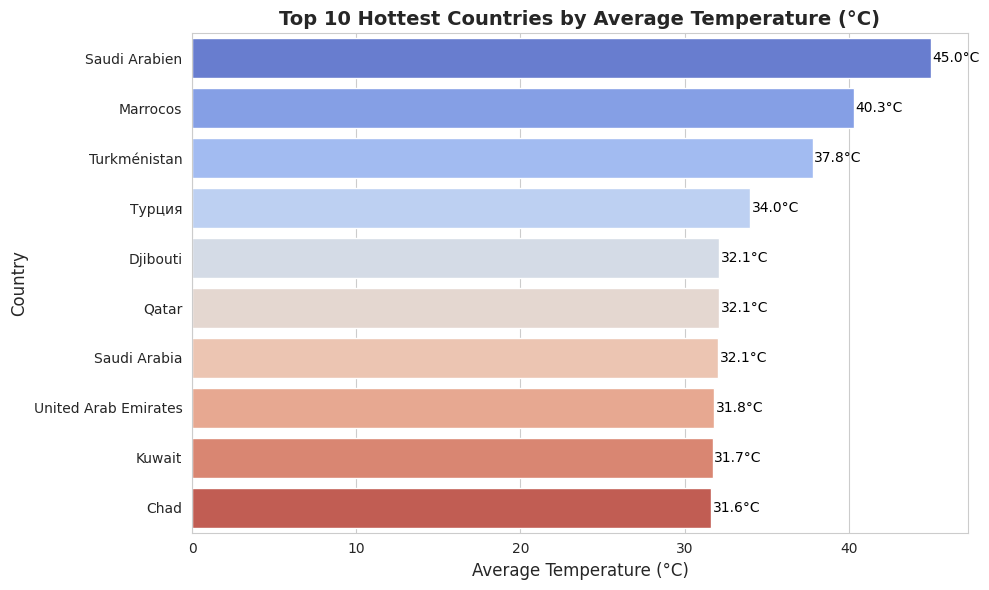

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the cleaned dataset 'df'
country_avg = df.groupby("country")[['temperature_celsius', 'air_quality_PM2.5']].mean().reset_index()

# Get top 10 countries with highest average temperature
top_temp = country_avg.sort_values(by='temperature_celsius', ascending=False).head(10)

# Define a custom color palette (in reverse, to show a gradient from low to high)
custom_palette = sns.color_palette("coolwarm", n_colors=10)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_temp,
    x='temperature_celsius',
    y='country',
    palette=custom_palette
)

# Title and labels with more specific details
plt.title('Top 10 Hottest Countries by Average Temperature (°C)', fontsize=14, fontweight='bold')
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Optional: Add the temperature values on the bars for clarity
for index, value in enumerate(top_temp['temperature_celsius']):
    plt.text(value + 0.1, index, f'{value:.1f}°C', va='center', fontsize=10, color='black')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


<ipython-input-65-d171d6c3948d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


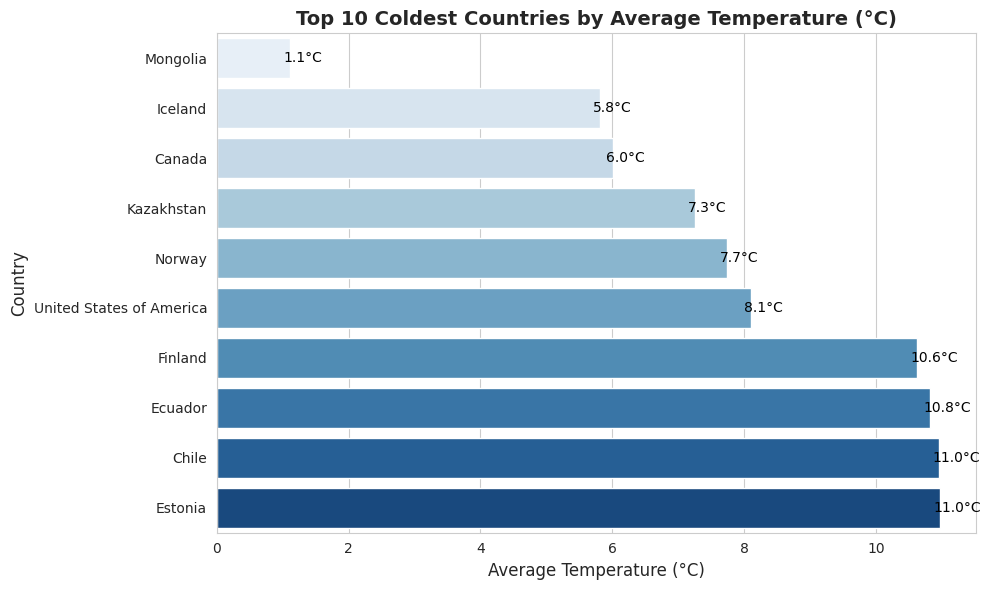

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the cleaned dataset 'df'
country_avg = df.groupby("country")[['temperature_celsius', 'air_quality_PM2.5']].mean().reset_index()

# Get top 10 coldest countries by sorting in ascending order
top_temp = country_avg.sort_values(by='temperature_celsius', ascending=True).head(10)

# Define a custom color palette for cold temperatures (blue shades)
custom_palette = sns.color_palette("Blues", n_colors=10)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_temp,
    x='temperature_celsius',
    y='country',
    palette=custom_palette
)

# Title and labels with more specific details
plt.title('Top 10 Coldest Countries by Average Temperature (°C)', fontsize=14, fontweight='bold')
plt.xlabel('Average Temperature (°C)', fontsize=12)
plt.ylabel('Country', fontsize=12)

# Optional: Add the temperature values on the bars for clarity
for index, value in enumerate(top_temp['temperature_celsius']):
    plt.text(value - 0.1, index, f'{value:.1f}°C', va='center', fontsize=10, color='black')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
#data cleaning and preprocessing:
df.drop_duplicates(inplace=True)
columns_to_drop = ["temperature_fahrenheit", "wind_mph", "pressure_in", "precip_in", "feels_like_fahrenheit","visibility_miles", "gust_mph"]
df_cleaned = df.drop(columns=columns_to_drop)

# Convert 'last_updated' to datetime and set it as index
df_cleaned["last_updated"] = pd.to_datetime(df_cleaned["last_updated"], format='%Y-%m-%d %H:%M', errors='coerce')
df_cleaned.set_index("last_updated", inplace=True)

df_cleaned.columns=df_cleaned.columns.str.lower().str.replace(" ", "_")

for col in df_cleaned.columns:
    if df_cleaned[col].dtype == 'object':
        mode_val = df_cleaned[col].mode()[0] if not df_cleaned[col].mode().empty else 'Unknown'
        df_cleaned[col] = df_cleaned[col].fillna(mode_val)
    else:
        df_cleaned[col] = df_cleaned[col].fillna(method='ffill').fillna(method='bfill')
time_columns = ["sunrise", "sunset", "moonrise", "moonset"]
for col in time_columns:
    if col in df_cleaned.columns:
        df_cleaned[col] = pd.to_datetime(df_cleaned[col], format="%I:%M %p", errors="coerce").dt.time

#Outlier removal using Z-score method
def outliers(df, threshold=3):
    numeric_df = df.select_dtypes(include=[np.number])
    z_score = np.abs((numeric_df - numeric_df.mean()) / numeric_df.std())
    return df[(z_score < threshold).all(axis=1)]

df_cleaned = outliers(df_cleaned)

#Display unique values for all object columns
for col in df_cleaned.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}:", df_cleaned[col].unique())

<ipython-input-10-56d5222e2c19>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_cleaned[col] = df_cleaned[col].fillna(method='ffill').fillna(method='bfill')


Unique values in country: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brunei Darussalam'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Madagascar' 'Cape Verde' 'Cambodia'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Swaziland' 'Ethiopia' 'Fiji Islands' 'Finland'
 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Vatican City'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati' 'Kuwait'
 'Kyrghyzstan' 

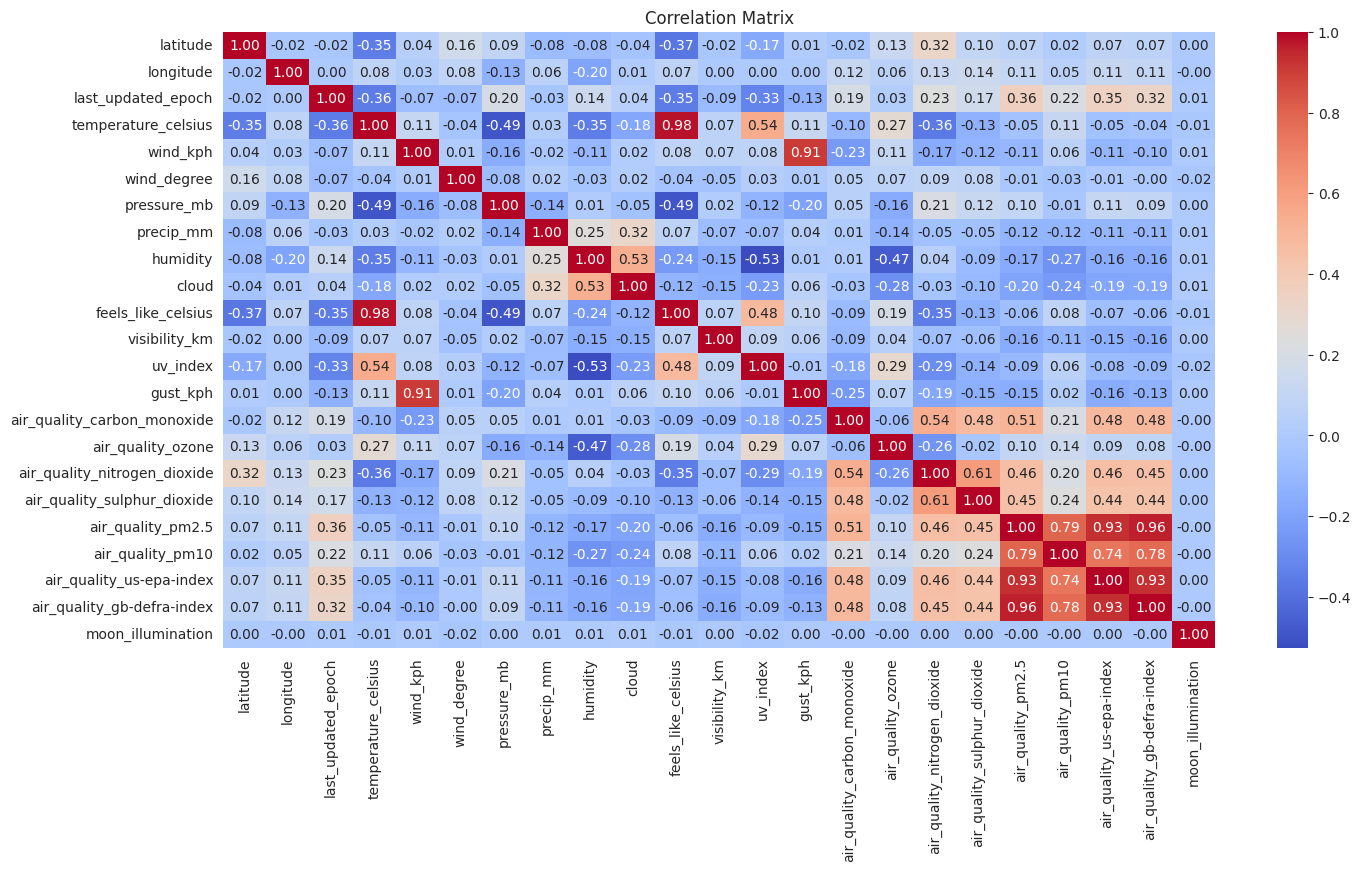

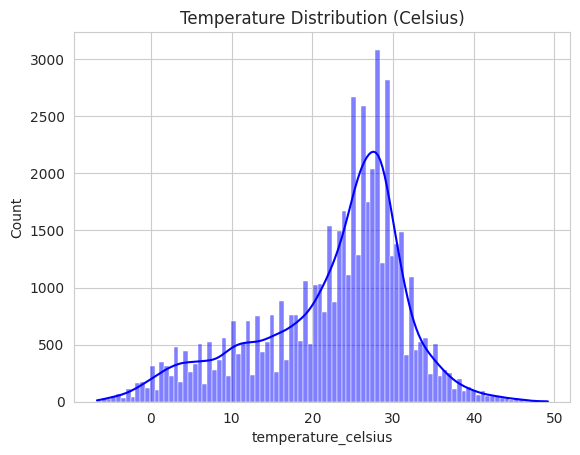

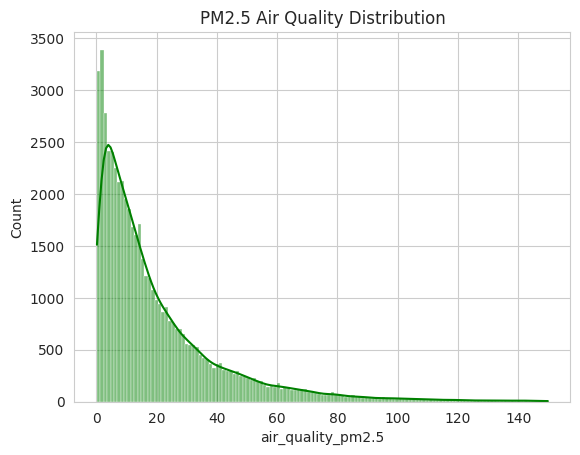

In [ ]:
# Exploratory Data Analysis (EDA)
sns.set_style("whitegrid")

numeric_data = df_cleaned.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

sns.histplot(df_cleaned['temperature_celsius'], kde=True, color='blue')
plt.title("Temperature Distribution (Celsius)")
plt.show()

sns.histplot(df_cleaned['air_quality_pm2.5'], kde=True, color='green')
plt.title("PM2.5 Air Quality Distribution")
plt.show()



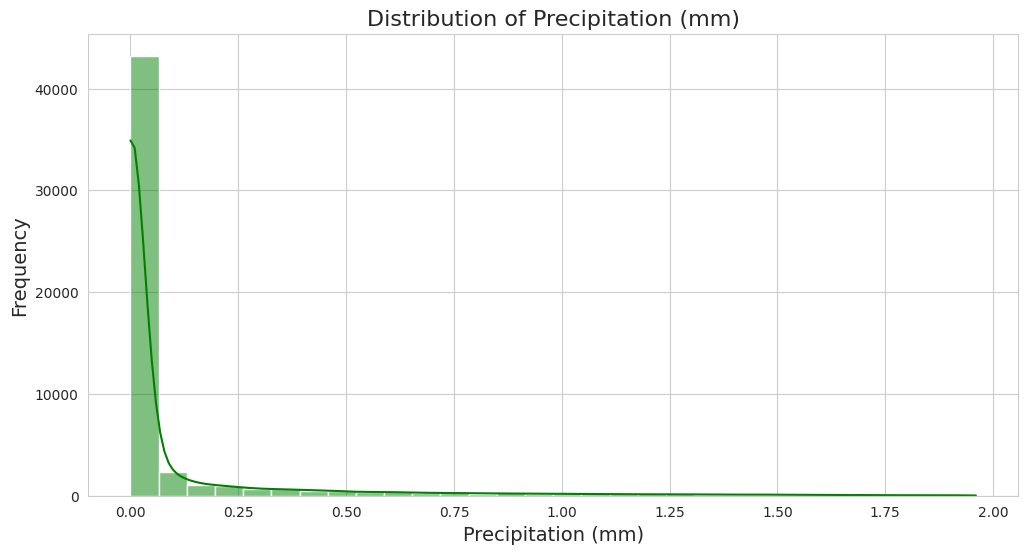

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


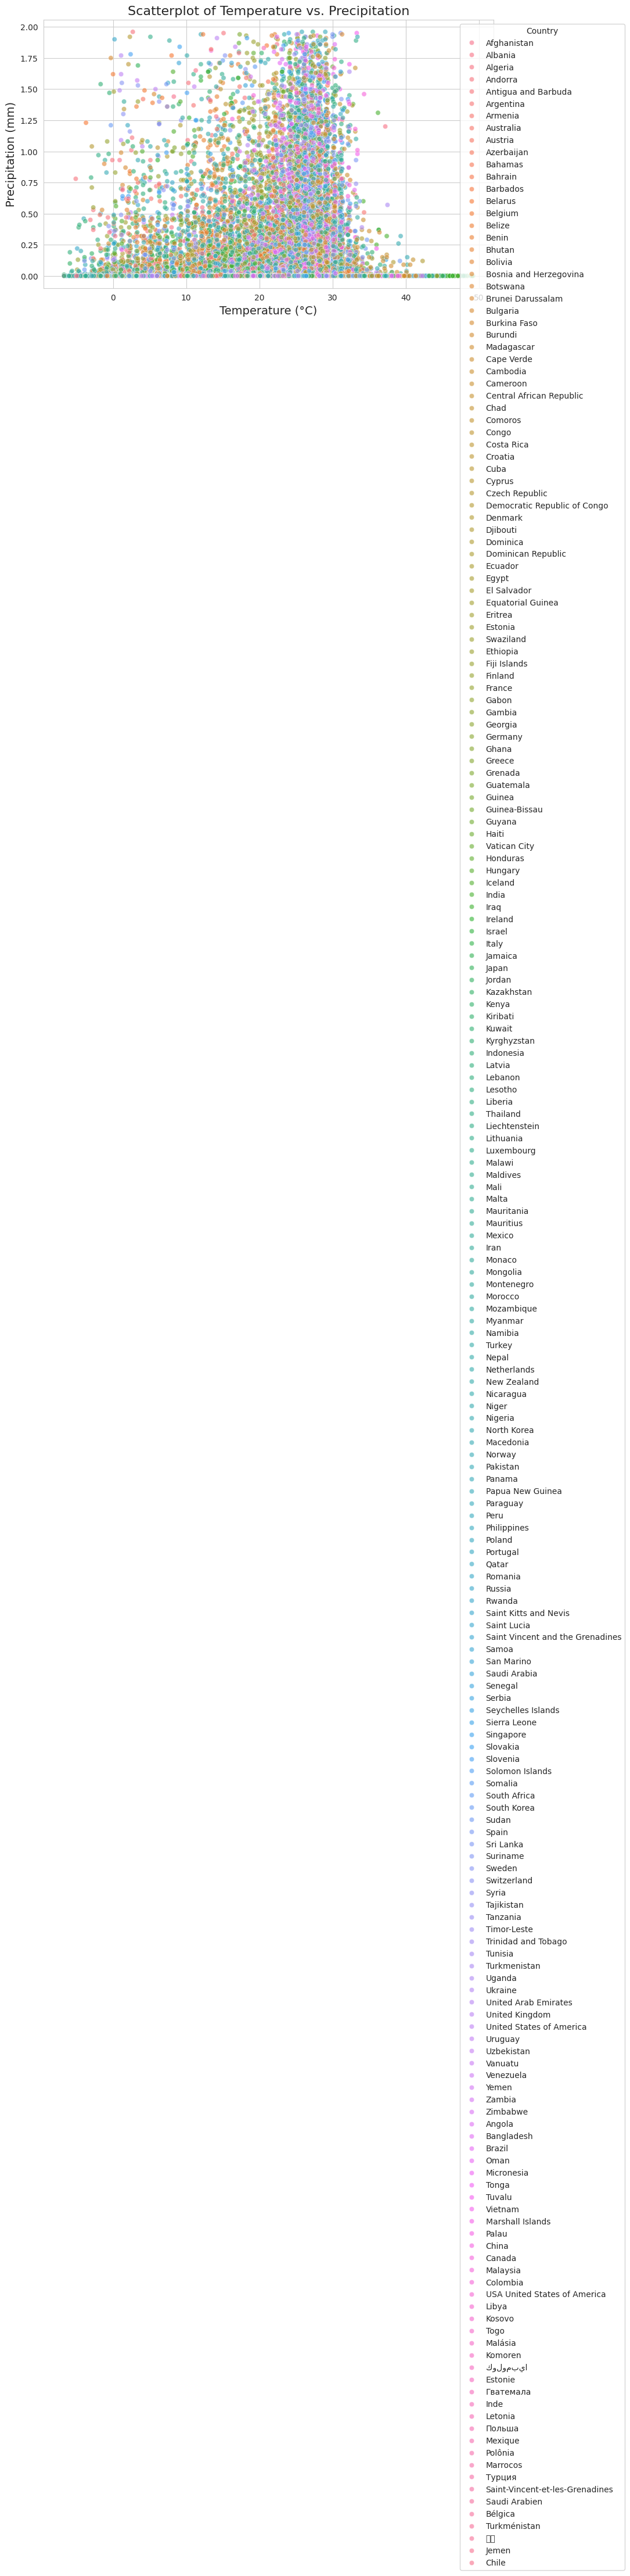

In [ ]:
# Visualization 3: Distribution of Precipitation
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['precip_mm'], kde=True, bins=30, color='green')
plt.title('Distribution of Precipitation (mm)', fontsize=16)
plt.xlabel('Precipitation (mm)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# Visualization 4: Scatterplot of Temperature vs. Precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='temperature_celsius', y='precip_mm', hue='country', alpha=0.6)
plt.title('Scatterplot of Temperature vs. Precipitation', fontsize=16)
plt.xlabel('Temperature (°C)', fontsize=14)
plt.ylabel('Precipitation (mm)', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Country')
plt.grid(True)
plt.show()

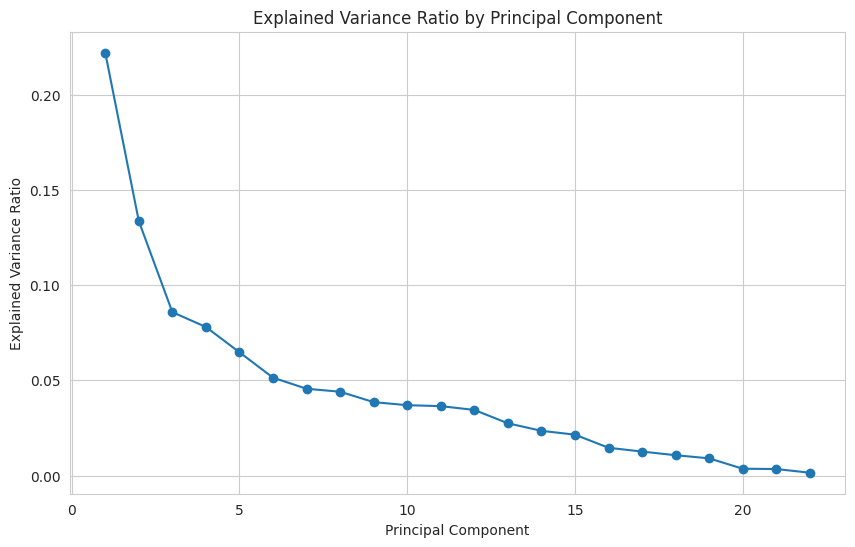

[0.2220145  0.13362738 0.0858315  0.07803281 0.06475868 0.05142608
 0.04560725 0.04404155 0.03858552 0.03697567 0.03648354 0.03448483
 0.02748265 0.0235173  0.02150686 0.01462159 0.01262297 0.01071283
 0.00906843 0.00361069 0.00346712 0.00152024]


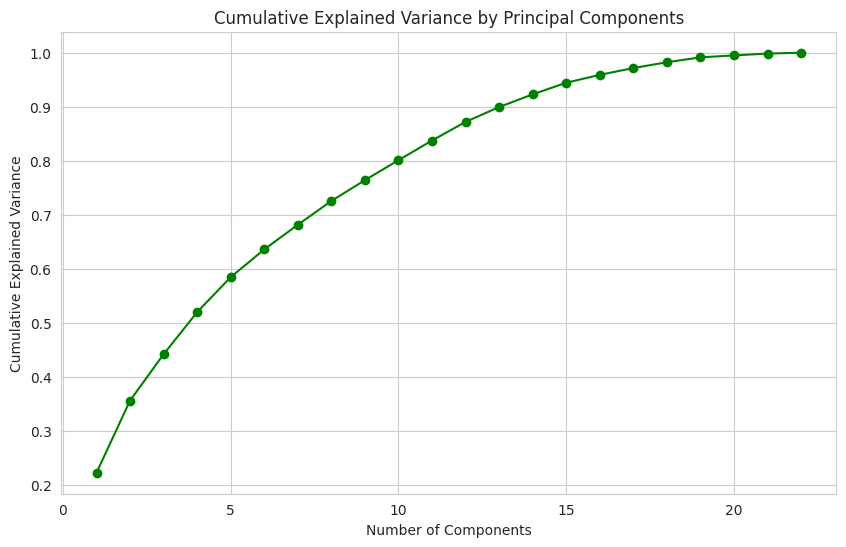

[0.2220145  0.35564188 0.44147338 0.51950619 0.58426487 0.63569096
 0.68129821 0.72533976 0.76392529 0.80090095 0.83738449 0.87186932
 0.89935198 0.92286928 0.94437613 0.95899773 0.97162069 0.98233352
 0.99140195 0.99501264 0.99847976 1.        ]


In [ ]:
y = df_cleaned['temperature_celsius']
X = df_cleaned.drop(columns=['temperature_celsius'])

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(X.select_dtypes(include=['number']))


# Step 2: Apply PCA
pca = PCA()
pca_components = pca.fit_transform(numeric_data_scaled)

# Step 3: Create a DataFrame with the principal components, using the same index as the original data
pca_df = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])], index=df_cleaned.index)

# visualizing the explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()
print(pca.explained_variance_ratio_)
#  Cumulative explained variance plot
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

print(cumulative_variance)


In [ ]:
# Specify the number of components to keep (e.g., 10)
n_components = 10

# Perform PCA transformation to keep only the first 10 components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(numeric_data_scaled)

# Create a DataFrame to store the reduced data
pca_df = pd.DataFrame(pca_data, columns=[f'PC{i+1}' for i in range(n_components)])

# Show the transformed data (first 5 rows)
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.425549 -1.936587 -1.074002  0.947974  1.842894 -1.004765  0.230504   
1 -2.074717  0.505572 -0.112751  0.321298  1.336370 -1.441000  0.047228   
2 -0.055982 -0.143655 -0.518357  1.299515  2.571407  1.439069 -0.519877   
3 -1.566807  1.865136  0.555791 -0.667789  0.969184 -3.861306 -0.088103   
4 -2.082197  0.701265 -0.209351 -0.075073 -0.695758  0.795253 -0.384341   

        PC8       PC9      PC10  
0 -0.070646 -0.252698  0.167304  
1 -0.576129  0.608988  0.212201  
2 -2.081625 -0.313037  0.144263  
3 -1.269974 -2.552065  0.019066  
4 -1.616323  0.537506  0.118865  


In [ ]:
pca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53274 entries, 0 to 53273
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     53274 non-null  float64
 1   PC2     53274 non-null  float64
 2   PC3     53274 non-null  float64
 3   PC4     53274 non-null  float64
 4   PC5     53274 non-null  float64
 5   PC6     53274 non-null  float64
 6   PC7     53274 non-null  float64
 7   PC8     53274 non-null  float64
 8   PC9     53274 non-null  float64
 9   PC10    53274 non-null  float64
dtypes: float64(10)
memory usage: 4.1 MB


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28779 (\N{CJK UNIFIED IDEOGRAPH-706B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 40481 (\N{CJK UNIFIED IDEOGRAPH-9E21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


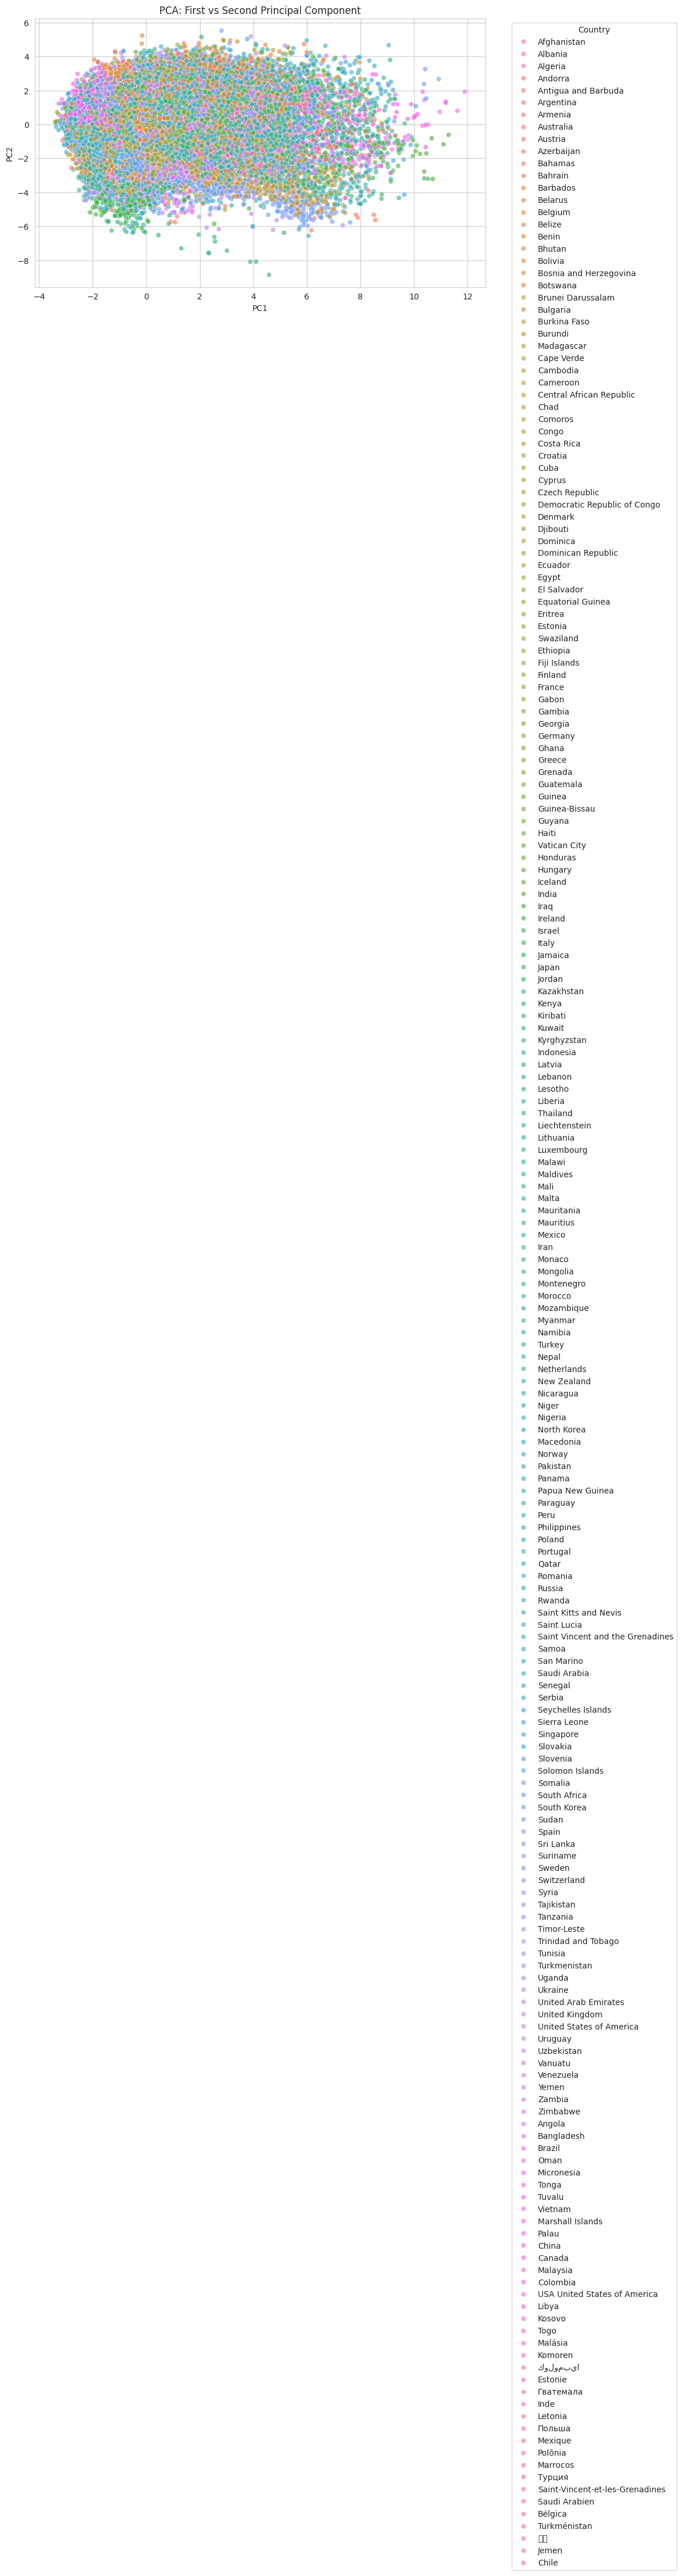

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'], hue=df_cleaned['country'], alpha=0.6)
plt.title('PCA: First vs Second Principal Component')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:

split_index = int(len(pca_df) * 0.8)

X_train = pca_df.iloc[:split_index]
X_test = pca_df.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = rf.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.2f}")


Random Forest MSE: 11.50
Random Forest R²: 0.89


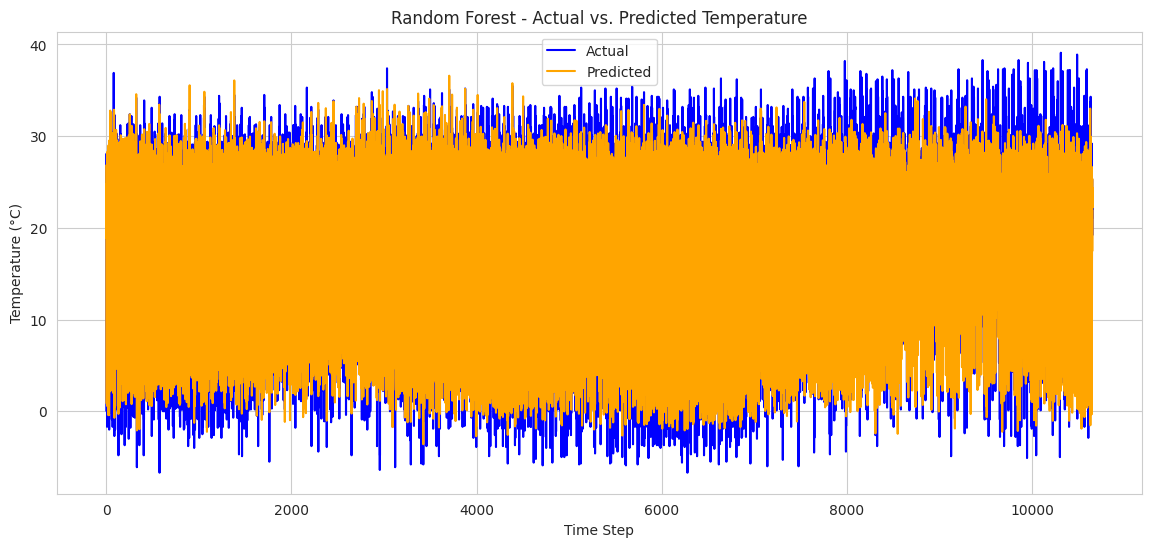

In [ ]:
# Optional: Plotting Actual vs. Predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label="Actual", color="blue")
plt.plot(y_pred, label="Predicted", color="orange")
plt.title("Random Forest - Actual vs. Predicted Temperature")
plt.xlabel("Time Step")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
df_cleaned["last_updated"] = pd.to_datetime(df_cleaned["last_updated_epoch"], unit='s', errors='coerce')
df_cleaned.set_index("last_updated", inplace=True)

df_cleaned = df_cleaned.apply(pd.to_numeric, errors='coerce')
# Ensure datetime index
df_resampled = df_cleaned.resample('D').mean()
df_resampled = df_resampled.dropna(subset=['temperature_celsius'])

# Extract temperature series and ensure DatetimeIndex
temperature_series = df_resampled['temperature_celsius']
temperature_series.index = pd.to_datetime(temperature_series.index)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(temperature_series.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -0.8716227719291781
p-value: 0.7971737730517373


In [ ]:
df_resampled['temperature_celsius_diff'] = df_resampled['temperature_celsius'].diff().dropna()


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df_resampled['temperature_celsius_diff'].dropna())
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")


ADF Statistic: -10.428973623241085
p-value: 1.6294688939035804e-18


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


MAE: 0.53, RMSE: 0.64


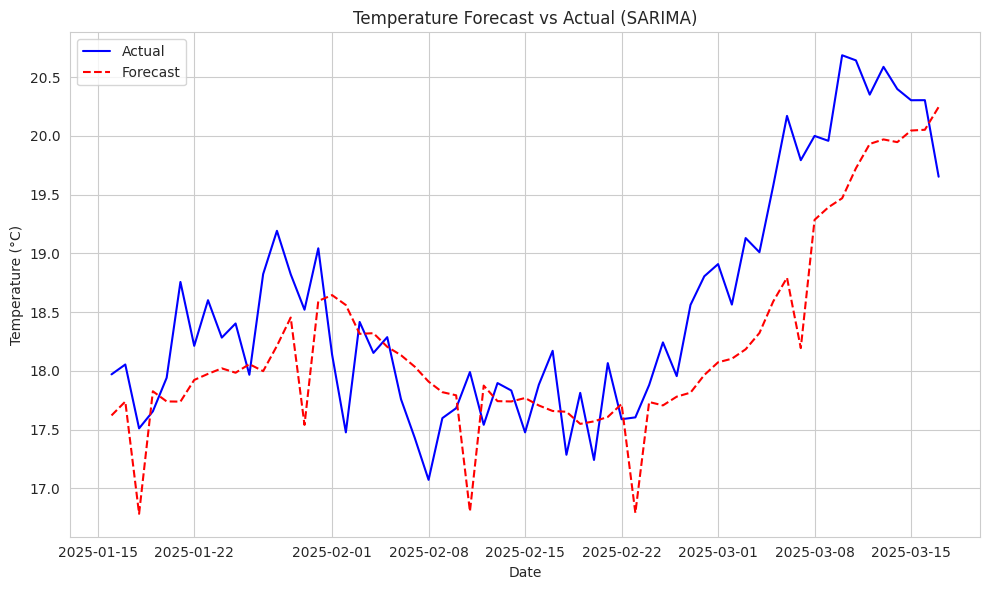

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

split_idx = int(len(df_resampled) * 0.8)
train = df_resampled[:split_idx]
test = df_resampled[split_idx:]

sarima_model = SARIMAX(df_resampled['temperature_celsius'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_results = sarima_model.fit()

# Make predictions
forecast_sarima = sarima_results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate the model
mae = mean_absolute_error(test['temperature_celsius'], forecast_sarima)
rmse = np.sqrt(mean_squared_error(test['temperature_celsius'], forecast_sarima))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, test['temperature_celsius'], label='Actual', color='blue')
plt.plot(test.index, forecast_sarima, label='Forecast', color='red', linestyle='dashed')
plt.title("Temperature Forecast vs Actual (SARIMA)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()


Linear Regression -> MSE: 8.58, R²: -7.78
XGBoost           -> MSE: 1.62, R²: -0.66


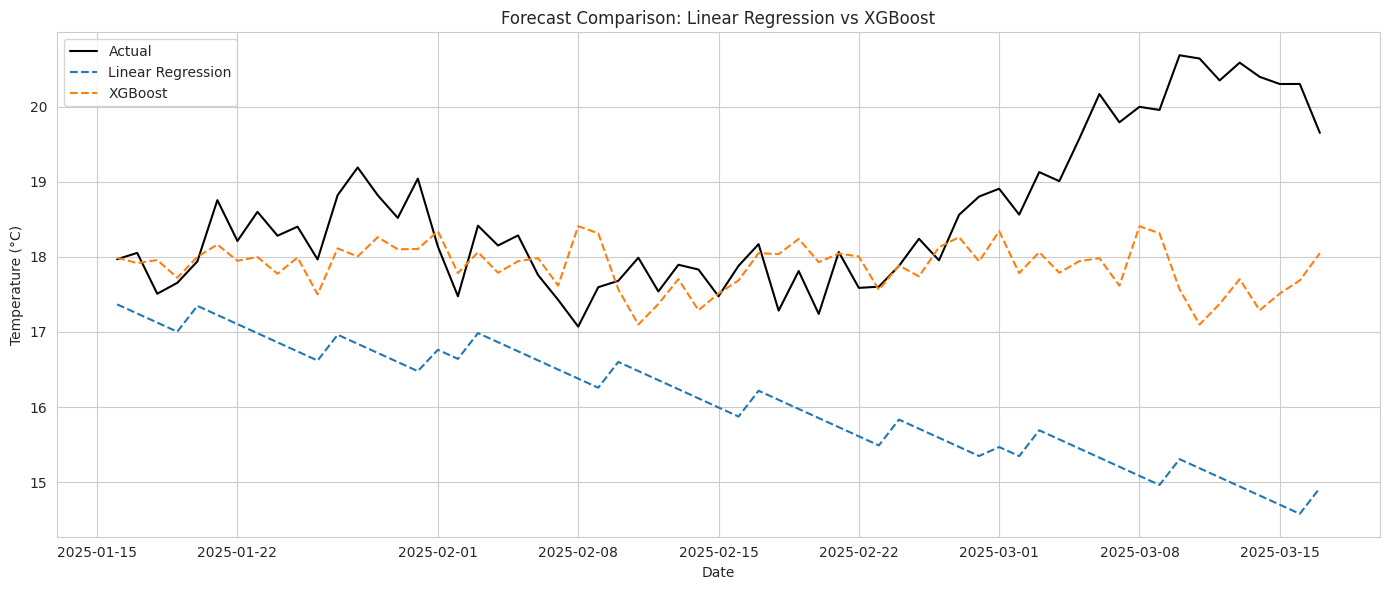

In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# -------------------
# Feature Engineering
# -------------------
df_resampled["year"] = df_resampled.index.year
df_resampled["month"] = df_resampled.index.month
df_resampled["day"] = df_resampled.index.day
df_resampled["day_of_week"] = df_resampled.index.dayofweek

features = ["year", "month", "day", "day_of_week"]
target = "temperature_celsius"

# -------------------
# Train-Test Split
# -------------------
split_idx = int(len(df_resampled) * 0.8)
train, test = df_resampled[:split_idx], df_resampled[split_idx:]

X_train, X_test = train[features], test[features]
y_train, y_test = train[target], test[target]

# -------------------
# Linear Regression
# -------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# -------------------
# XGBoost Regressor
# -------------------
xgb = XGBRegressor(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# -------------------
# Evaluation
# -------------------
models = {
    "Linear Regression": lr_preds,
    "XGBoost": xgb_preds
}

for name, preds in models.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name:<17} -> MSE: {mse:.2f}, R²: {r2:.2f}")

# -------------------
# Plotting
# -------------------
plt.figure(figsize=(14, 6))
plt.plot(test.index, y_test, label="Actual", color="black")

for name, preds in models.items():
    plt.plot(test.index, preds, label=name, linestyle="--")

plt.title("Forecast Comparison: Linear Regression vs XGBoost")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



🔍 Model Evaluation:
Linear Regression -> MSE: 8.58, R²: -7.78
XGBoost           -> MSE: 1.62, R²: -0.66
SARIMA            -> MSE: 0.41, R²: 0.58


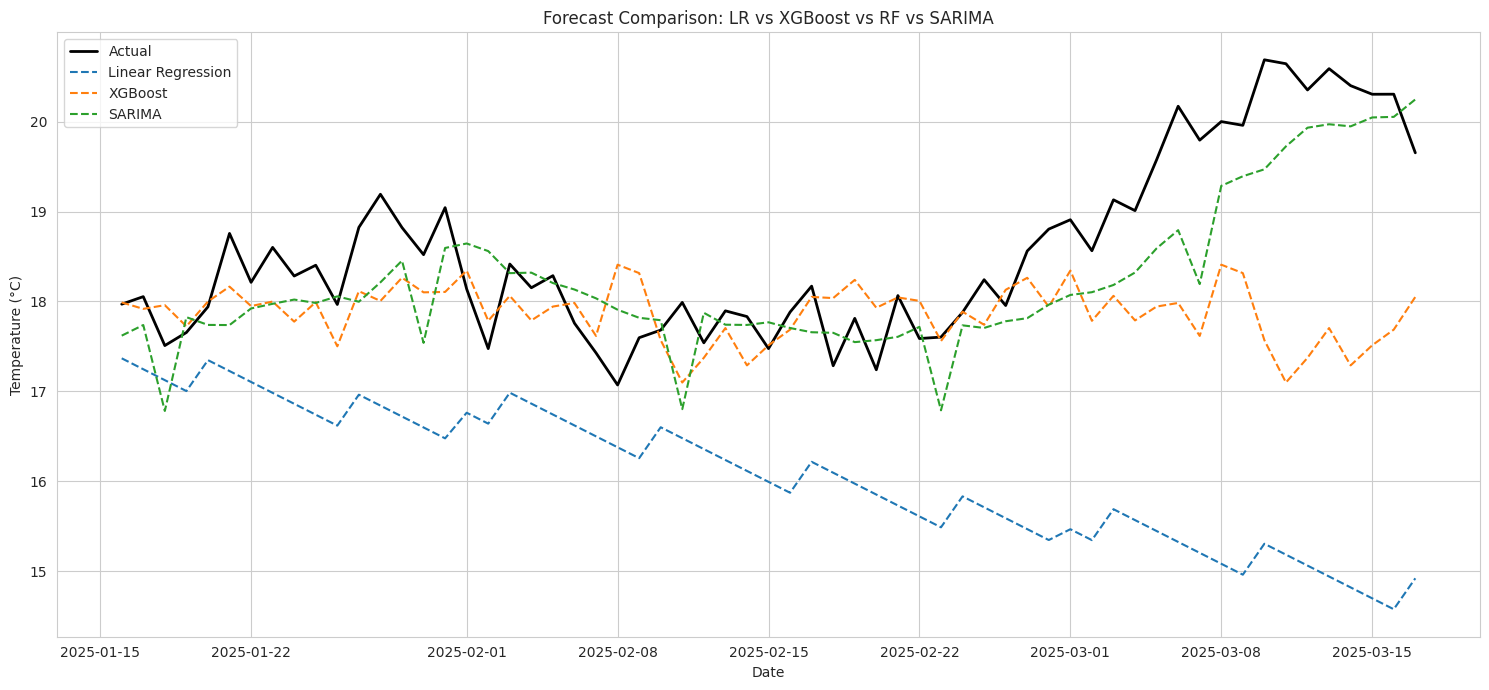

In [ ]:

sarima_preds = sarima_results.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

models = {
    "Linear Regression": lr_preds,
    "XGBoost": xgb_preds,
    "SARIMA": sarima_preds
}

print("\n🔍 Model Evaluation:")
for name, preds in models.items():
    mse = mean_squared_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    print(f"{name:<17} -> MSE: {mse:.2f}, R²: {r2:.2f}")

# --------------------
# Plot
# --------------------
plt.figure(figsize=(15, 7))
plt.plot(test.index, y_test, label="Actual", color="black", linewidth=2)

for name, preds in models.items():
    plt.plot(test.index, preds, label=name, linestyle="--")

plt.title("Forecast Comparison: LR vs XGBoost vs RF vs SARIMA")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()